# Viterbi Algorithm to find the path with highest likelihood


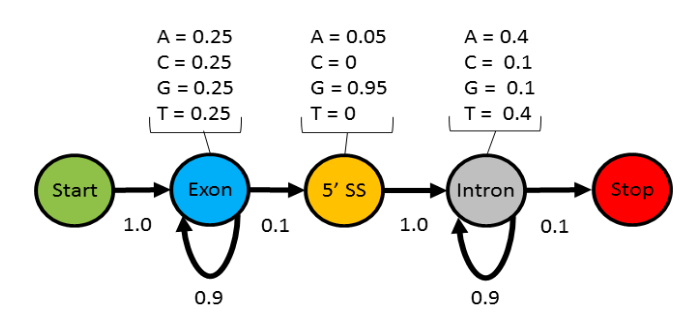

Below you can find short explanations of the variables used :
- delta_i is the highest probability along a single path
- obs is observations
- T is length of observations
- states are all your states
- q is state q in all your states
- phi is start/initial probabilies
- trans_p is transition probabilities (A)
- emit_p is emission probabilities (B)

In [ ]:
# Helps visualize the steps of Viterbi.
def print_path_probability_matrix(P,states):
    for q in states: print(q+ ":\t" + "\t".join(("%.2e" % (p)) for p in P[q]))

Your assignment starts from here. You will fill out the missing lines in the implementation of viterbi algorithm below.

In [ ]:
def viterbi(obs, states, phi, trans_p, emit_p):
    # We will create two variables; P and backpointer.
    # Both variables (P and backpointer) are dictionaries.

    P = {}
    backpointer = {}
    T=len(obs)

    # Initialization step

    for q in states:
        P[q] = [phi[q] * emit_p[q][obs[0]]]
        backpointer[q] = ["Start"]


    # Recursion step
    for t in range(1,T):
      for s in states:
        probs = []
        for s0 in states:
          probs.append((P[s0][t-1]) * (trans_p[s0][s]) * (emit_p[s][obs[t]]))



        P[s].append(max(probs))
        max_idx = probs.index(max(probs))
        backpointer[s].append(states[max_idx])




    # Finalization step
    (delta_i, state)=max((P[q][-1] * trans_p[q]["end"], q) for q in states)
    P["End"]=delta_i
    backpointer["End"]=state

    print_path_probability_matrix(P,states)

    # To retrieve the best path
    path = []
    curr_state = state
    for idx in range(1,T+1):
      path.append(curr_state)
      curr_state = backpointer[curr_state][-(idx)]



    return ("probability of the best path to observe the sequence: %.2e \nthe best path: %s" % (delta_i, "\t".join(path[::-1])))

In [ ]:
states = ('Exon', 'Splice', 'Intron' )
seq="CTTCATGTGAAAGCAGACGTAAGTCA"
observations=tuple(seq)
start_probability = {'Exon': 1.0, 'Splice': 0.0, 'Intron': 0.0}
transition_probability = {
   'Exon' : {'Exon': 0.9, 'Splice': 0.1, 'Intron': 0.0, 'end': 0.0},
   'Splice' : {'Exon': 0.0, 'Splice': 0.0, 'Intron': 1.0, 'end': 0.0},
   'Intron' : {'Exon': 0.0, 'Splice': 0.0, 'Intron': 0.9, 'end': 0.1}
   }
emission_probability = {
   'Exon' : {'A': 0.25, 'C': 0.25, 'G': 0.25, 'T': 0.25},
   'Splice' : {'A': 0.05, 'C': 0.0, 'G': 0.95, 'T': 0.0},
   'Intron' : {'A': 0.4, 'C': 0.1, 'G': 0.1, 'T': 0.4},
   }


final=viterbi(observations, states, start_probability, transition_probability, emission_probability)
print(final)


Exon:	2.50e-01	5.63e-02	1.27e-02	2.85e-03	6.41e-04	1.44e-04	3.24e-05	7.30e-06	1.64e-06	3.69e-07	8.31e-08	1.87e-08	4.21e-09	9.47e-10	2.13e-10	4.79e-11	1.08e-11	2.43e-12	5.46e-13	1.23e-13	2.76e-14	6.22e-15	1.40e-15	3.15e-16	7.08e-17	1.59e-17
Splice:	0.00e+00	0.00e+00	0.00e+00	0.00e+00	1.42e-05	0.00e+00	1.37e-05	0.00e+00	6.93e-07	8.21e-09	1.85e-09	4.16e-10	1.78e-09	0.00e+00	4.73e-12	2.02e-11	2.40e-13	0.00e+00	2.31e-13	0.00e+00	6.14e-16	1.38e-16	5.91e-16	0.00e+00	0.00e+00	3.54e-19
Intron:	0.00e+00	0.00e+00	0.00e+00	0.00e+00	0.00e+00	5.70e-06	5.13e-07	5.48e-06	4.93e-07	2.77e-07	9.98e-08	3.59e-08	3.23e-09	2.91e-10	1.05e-10	9.43e-12	8.10e-12	7.29e-13	6.56e-14	9.22e-14	3.32e-14	1.20e-14	1.08e-15	3.87e-16	3.49e-17	1.25e-17
probability of the best path to observe the sequence: 1.25e-18 
the best path: Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Exon	Splice	Intron	Intron	Intron	Intron	Intron	Intron	Intron
